# CITAS ENTRE ARTÍCULOS EN LA CONSTITIUCION CHILENA DE 1980.  

### **CREACIÓN BBDD**   

Ricardo Vega M. 
Escuela de Diseño, Escuela de Ingeniería.  
Universidad Católica de Chile.   
Noviembre, Diciembre, Enero 2024.  
Santiago, Chile.  

- Textos de la constitución basado en material original desde repositorio https://github.com/rmaureira/audiopropuesta


<div style="background-color:blue; padding:10px;color:blue; 
            color:white;text-align:center; font-size:20px;"> 
1- SETUP Y LEER ARCHIVOS
</div>

In [79]:
#### IMPORTAR LIBRERIAS 
import pandas as pd
import os
import re

import pandas as pd
from matplotlib import pyplot as plt

import networkx as nx

#pd.set_option('max_columns', None)

In [84]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [11]:
# - - - - - - - - - - - - - - - - - - 
# Busca carpetas y nombres de carpetas de constituciones
# - - - - - - - - - - - - - - - - - - 

#ruta_carpeta_madre  = "../c80_comparador/const_datos_2024/"
carpeta_madre = "Chile/"
l_carpetas_const   = ["c1925_txt_ok","c1980_txt_ok","c2022_txt_ok","c2023_txt_ok","c2023exp_txt_ok" ] 
#print( l_carpetas_const )

# cual constitucion escoger
cual_const = 1

# - - - - - - - - - - - - - - - - - - 
ruta_const_archivos = carpeta_madre + l_carpetas_const[ cual_const ] +"/"
print( ruta_const_archivos )


Chile/c1980_txt_ok/


In [13]:
# - - - - - - - - - - - - - - - - - - 
# Listar archivos de la carpeta de la const escogida
# - - - - - - - - - - - - - - - - - - 

archivos_names = os.listdir(ruta_const_archivos) 
archivos_names =  sorted( archivos_names ) 

# - - - - - - - - - - - - - - - - - - 
# borrar archivos ocultos mac
if '.DS_Store' in archivos_names:
    archivos_names.remove('.DS_Store')

# - - - - - - - - - - - - - - - - - - 
#print(ruta_const_archivos)
print("Cuantos:",len(archivos_names))
print(archivos_names)



Cuantos: 200
['capitulo-01-articulo-001.txt', 'capitulo-01-articulo-002.txt', 'capitulo-01-articulo-003.txt', 'capitulo-01-articulo-004.txt', 'capitulo-01-articulo-005.txt', 'capitulo-01-articulo-006.txt', 'capitulo-01-articulo-007.txt', 'capitulo-01-articulo-008.txt', 'capitulo-01-articulo-009.txt', 'capitulo-02-articulo-010.txt', 'capitulo-02-articulo-011.txt', 'capitulo-02-articulo-012.txt', 'capitulo-02-articulo-013.txt', 'capitulo-02-articulo-014.txt', 'capitulo-02-articulo-015.txt', 'capitulo-02-articulo-016.txt', 'capitulo-02-articulo-017.txt', 'capitulo-02-articulo-018.txt', 'capitulo-03-articulo-019.txt', 'capitulo-03-articulo-020.txt', 'capitulo-03-articulo-021.txt', 'capitulo-03-articulo-022.txt', 'capitulo-03-articulo-023.txt', 'capitulo-04-articulo-024.txt', 'capitulo-04-articulo-025.txt', 'capitulo-04-articulo-026.txt', 'capitulo-04-articulo-027.txt', 'capitulo-04-articulo-028.txt', 'capitulo-04-articulo-029.txt', 'capitulo-04-articulo-030.txt', 'capitulo-04-articulo-031.

In [17]:
# - - - - - - - - - - - - - - - - - - 
# Leer contenidos de constitucion
# - - - - - - - - - - - - - - - - - - 

archivos_names_len = len(archivos_names)
#print(archivos_names_len)

# - - - - - - - - - - - - - - - - - - 
# Leer archivo

# pasar a funcion de leer contenido
cap_content = ""
cual = 0
with open( ruta_const_archivos+archivos_names[ cual ] ) as archivo:
        txt = archivo.read()
        cap_content = txt
        
cap_content 


'Artículo 1..\n\nLas personas nacen libres e iguales en dignidad y derechos.\n\nLa familia es el núcleo fundamental de la sociedad.\n\nEl Estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad y les garantiza la adecuada autonomía para cumplir sus propios fines específicos.\n\nEl Estado está al servicio de la persona humana y su finalidad es promover el bien común, para lo cual debe contribuir a crear las condiciones sociales que permitan a todos y a cada uno de los integrantes de la comunidad nacional su mayor realización espiritual y material posible, con pleno respeto a los derechos y garantías que esta Constitución establece.\n\nEs deber del Estado resguardar la seguridad nacional, dar protección a la población y a la familia, propender al fortalecimiento de ésta, promover la integración armónica de todos los sectores de la Nación y asegurar el derecho de las personas a participar con igualdad de oportunidades en la vida nacion

<div style="background-color:blue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
2- CAPS Y ART: PRUEBAS ADQUIRIR Y FORMATEAR CONTENIDO
</div>


In [65]:
# - - - - - - - - - - - - - - - - - -         
# FUNCIONES: Leer archivos,  titulos y contenidos de articulos-disposiciones
# - - - - - - - - - - - - - - - - - - 

# - - - - - - - - - - - - - - - - - - 
# Obtiene nombres capitulo desde nombre de cada archivo (para articulos y disposiciones transitorias) 
# - - - - - - - - - - - - - - - - - - 

def archivo_cap_tit( _cual_art, _archivos_names):
    tit       = _archivos_names[ _cual_art ].replace("-"," ")
    
    # - - - - - - - - - - - - - - - - - - 
    # Formatear nombre capitulo 
    if "capitulo" in tit:
        # capitulo-01-articulo-001.txt
        cap_indx_palabra_articulo = tit.index("articulo") # encuentra palabra Articulo
        cap_tit_text              = tit[:cap_indx_palabra_articulo] # deja parte del titulo y su numero 
        cap_indx_palabra_espacio  = tit.index(" ") # encuentra espacio despues de capitulo
        # ubica ceros y los borra
        if cap_tit_text[ cap_indx_palabra_espacio+1 ] == "0": # encuentra ceros en la primera posicion
            cap_tit_text_clean = cap_tit_text.replace("0","", 1)  
        else: 
            cap_tit_text_clean = cap_tit_text 
        return  cap_tit_text_clean.title()  # cap_tit
    
    # - - - - - - - - - - - - - - - - - - 
    # Formatear nombre capitulo 
    if "disposiciones" in tit:
        # disposiciones-transitorias-044.txt
        disp_indx_palabra_cero = tit.index("0") # encuentra palabra Articulo
        disp_tit_texto         = tit[:disp_indx_palabra_cero] # deja parte del titulo 
        
        disp_tit_numero        = tit[disp_indx_palabra_cero:].replace(".txt", "") # 
        # ubica ceros y los borra
        if disp_tit_numero[0] == "0": # encuentra ceros en la primera posicion
            disp_tit_numero_clean = disp_tit_numero.replace("0","", 1)
            pass
        else: 
            disp_tit_numero_clean = disp_tit_numero
            pass
        disp_tit_clean =disp_tit_texto + disp_tit_numero_clean
        return  disp_tit_clean.title()


#print( archivo_captit( 98, archivos_names ) )
#print( archivo_captit( 103, archivos_names ) )
#print( archivo_captit( 159, archivos_names ) )




# - - - - - - - - - - - - - - - - - - 
# Obtiene nombres articulo desde dentro de cada archivo (para articulos y disposiciones transitorias)
# ojo nombre articulo desde i = 150 es primera, segunda, etc. .. quincuagésima  
# - - - - - - - - - - - - - - - - - - 
def articulo_art_tit( _cual_art, _ruta_const_archivos, _archivos_names):
    art_content  = ""
    art_tit  = ""
    # lee archivo
    with open( _ruta_const_archivos+_archivos_names[ _cual_art ] ) as archivo:
            art_content = archivo.read()
    # split contenidos del archivo
    l_art_content_splited = art_content.split( "\n" )
    art_tit  = l_art_content_splited[0].replace("..", "").lower()
    
    #len( l_art_content_splited )
    return art_tit





# - - - - - - - - - - - - - - - - - - 
# Obtiene contenido del articulo desde cada archivo 
# - - - - - - - - - - - - - - - - - - 

def articulo_get_content( _cual_art, _ruta_const_archivos, _archivos_names):
    art_content  = ""
    # lee archivo
    with open( _ruta_const_archivos+_archivos_names[ _cual_art ] ) as archivo:
            art_content = archivo.read()
    # split contenidos del archivo
    l_art_content_splited = art_content.split( "\n" )
    #len( l_art_content_splited )
    return l_art_content_splited[1:]



In [66]:
# - - - - - - - - - - - - - - - - - - 
# Pruebas funcion articulo_get_content
# entrega texto del articulo
cual_art = 199
art_tit = articulo_art_tit( cual_art, ruta_const_archivos, archivos_names ) 
print( art_tit )


quincuagésima


In [67]:
# - - - - - - - - - - - - - - - - - - 
# Pruebas funcion articulo_get_content
# entrega texto del articulo
cual_art = 123
art_content = articulo_get_content( cual_art, ruta_const_archivos, archivos_names ) 
print( art_content )


['', 'En cada municipalidad habrá un concejo integrado por concejales elegidos por sufragio universal en conformidad a la ley orgánica constitucional de municipalidades. Durarán cuatro años en sus cargos y podrán ser reelegidos sucesivamente en el cargo hasta por dos períodos. La misma ley determinará el número de concejales y la forma de elegir al alcalde.', '', 'El concejo será un órgano encargado de hacer efectiva la participación de la comunidad local, ejercerá funciones normativas, resolutivas y fiscalizadoras y otras atribuciones que se le encomienden, en la forma que determine la ley orgánica constitucional respectiva.', '', 'La ley orgánica de municipalidades determinará las normas sobre organización y funcionamiento del concejo y las materias en que la consulta del alcalde al concejo será obligatoria y aquellas en que necesariamente se requerirá el acuerdo de éste. En todo caso, será necesario dicho acuerdo para la aprobación del plan comunal de desarrollo, del presupuesto mun

<div style="background-color:blue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
3- CAPS ADQUIRIR Y FORMATEAR OK
</div>


In [68]:
# - - - - - - - - - - - - - - - - - - 
# OBTENER TITULOS CAPITULOS DE CADA ARTICULO
# - - - - - - - - - - - - - - - - - - 

l_cap_tits = [] # capitulos titulos

for i in range(0,200): # 0-150 art / 151-200 transitorios
    _cual_art = i
    cada_tit  = archivo_cap_tit( _cual_art, archivos_names )
    # nombres cap y arttuulos transitorios
    l_cap_tits.append( cada_tit.lower() )
    
# mostrar    
#len(l_cap_tits)
l_cap_tits


['capitulo 1 ',
 'capitulo 1 ',
 'capitulo 1 ',
 'capitulo 1 ',
 'capitulo 1 ',
 'capitulo 1 ',
 'capitulo 1 ',
 'capitulo 1 ',
 'capitulo 1 ',
 'capitulo 2 ',
 'capitulo 2 ',
 'capitulo 2 ',
 'capitulo 2 ',
 'capitulo 2 ',
 'capitulo 2 ',
 'capitulo 2 ',
 'capitulo 2 ',
 'capitulo 2 ',
 'capitulo 3 ',
 'capitulo 3 ',
 'capitulo 3 ',
 'capitulo 3 ',
 'capitulo 3 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 4 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitulo 5 ',
 'capitu

<div style="background-color:blue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
4- ART TITS ADQUIRIR Y FORMATEAR 
</div>


In [72]:
# - - - - - - - - - - - - - - - - - - 
# OBTENER TITULOS CAPITULOS DE CADA ARTICULO
# - - - - - - - - - - - - - - - - - - 

l_art_tits = [] # articulos titulos

for i in range(0,200): # 0-150 art / 151-200 transitorios
    _cual_art = i
    cada_tit  = articulo_art_tit( i, ruta_const_archivos, archivos_names )
    articulo_art_tit
    # nombres cap y arttulos transitorios
    l_art_tits.append( cada_tit ) #.lower()
    
    
# mostrar    
len(l_art_tits)
l_art_tits


['artículo 1',
 'artículo 2',
 'artículo 3',
 'artículo 4',
 'artículo 5',
 'artículo 6',
 'artículo 7',
 'artículo 8',
 'artículo 9',
 'artículo 10',
 'artículo 11',
 'artículo 12',
 'artículo 13',
 'artículo 14',
 'artículo 15',
 'artículo 16',
 'artículo 17',
 'artículo 18',
 'artículo 19',
 'artículo 20',
 'artículo 21',
 'artículo 22',
 'artículo 23',
 'artículo 24',
 'artículo 25',
 'artículo 26',
 'artículo 27',
 'artículo 28',
 'artículo 29',
 'artículo 30',
 'artículo 31',
 'artículo 32',
 'artículo 33',
 'artículo 35',
 'artículo 36',
 'artículo 37',
 'artículo 37bis',
 'artículo 38',
 'artículo 38bis',
 'artículo 39',
 'artículo 40',
 'artículo 41',
 'artículo 42',
 'artículo 43',
 'artículo 44',
 'artículo 45',
 'artículo 34',
 'artículo 46',
 'artículo 47',
 'artículo 48',
 'artículo 49',
 'artículo 50',
 'artículo 51',
 'artículo 52',
 'artículo 53',
 'artículo 54',
 'artículo 55',
 'artículo 56',
 'artículo 56bis',
 'artículo 57',
 'artículo 58',
 'artículo 59',
 'artícu

<div style="background-color:blue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
5- CONTENIDOS ARTICULOS ADQUIRIR Y FORMATEAR  
</div>


In [73]:
# ver un solo articulo
#articulo_get_content( 199, ruta_const_archivos, archivos_names )


In [94]:
l_art_todos_como_listas = []
l_art_todos_plana       = []

# Menciones a palabra articulo y numero
l_art_menciones = []
#for texto in parrafo:
#    art_words.extend(re.findall(r'\bArt\w*\b', texto, re.IGNORECASE))
#    art_menciones.extend(re.findall(r'\bart\w*\s\d{1,3}\b', texto, re.IGNORECASE))
#print(art_menciones) 


for i in range(0,200): # 0-150 art / 150-200 transitorios
    _cual_articulo = i
    # articulos como listas 
    art_content       = articulo_get_content( _cual_articulo, ruta_const_archivos, archivos_names )
    l_art_todos_como_listas.append( art_content ) 
    
    # articulos como listas 
    art_content_plana = list(filter(bool, art_content))
    # limpia y coloca en lista todos
    art_content =""
    art_content = "\n".join( art_content_plana )
    art_content = art_content.replace("\n", " ") 

#    l_art_todos_plana.append( art_content ) # las guarda en bajas
    l_art_todos_plana.append( art_content.lower() ) # fguarda en altas

    
#len(l_art_todos_como_listas)
#l_art_todos_como_listas

#len(l_art_todos_plana)
#l_art_todos_plana


In [95]:
# ej 29
l_art_todos_plana[29]

'el presidente cesará en su cargo el mismo día en que se complete su período y le sucederá el recientemente elegido. el que haya desempeñado este cargo por el período completo, asumirá, inmediatamente y de pleno derecho, la dignidad oficial de ex presidente de la república. en virtud de esta calidad, le serán aplicables las disposiciones de los incisos segundo, tercero y cuarto del artículo 61 y el artículo 62. no la alcanzará el ciudadano que llegue a ocupar el cargo de presidente de la república por vacancia del mismo ni quien haya sido declarado culpable en juicio político seguido en su contra. el ex presidente de la república que asuma alguna función remunerada con fondos públicos, dejará, en tanto la desempeñe, de percibir la dieta, manteniendo, en todo caso, el fuero. se exceptúan los empleos docentes y las funciones o comisiones de igual carácter de la enseñanza superior, media y especial.'

<div style="background-color:blue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
6- CONTAR GENERALIDADES: Palabras, puntos, comas, etc
</div>


In [142]:
# Contgar puntos y comas en cada articulo 

l_art_palabras_cant = []  
l_art_comas_cant    = []  
l_art_puntos_cant   = []  


for i in range( len(df_articulos) ):  
    # contar puntos
    l_palabras = df_articulos["art_contenidos"].iloc[i]
    # contar puntos
    cuantos_puntos = l_palabras.count(".")
    l_art_puntos_cant.append( cuantos_puntos ) 

    # contar comas
    cuantas_comas  = l_palabras.count(",")
    l_art_comas_cant.append( cuantas_comas ) 
    
    # contar palabras 
    l_palabras = df_articulos["art_contenidos"].iloc[i].replace(".", "").split()
    l_art_palabras_cant.append( len(l_palabras) ) 

#print( len(l_art_palabras_cant) )
#l_art_comas_cant
#l_art_puntos_cant


<div style="background-color:blue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
7- PASAR LISTAS A DF
</div>


In [155]:
# dic 2024 
# ubnificar df

df_cols_data    = [l_cap_tits, l_art_tits, l_art_todos_plana, l_art_palabras_cant, l_art_comas_cant, l_art_puntos_cant ]
df_cols_nombres = ["cap_tits","art_tits", "art_contenidos", "art_palabras_cant", "art_comas_cant", "art_puntos_cant"  ]

las_listas = list(zip( l_cap_tits, l_art_tits, l_art_todos_plana, l_art_palabras_cant, l_art_comas_cant, l_art_puntos_cant  ))

df_articulos = pd.DataFrame(las_listas, columns= df_cols_nombres )
#df_articulos

# Alinear a la izquierda
#left_alig = df_articulos.style.set_properties(**{'text-align': 'left'})
#display(left_alig)


<div style="background-color:skyblue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
8- CONTAR LOS REFERENCIAS A ARTICULOS EN CADA TEXTO
</div>

In [156]:

def art_menciones( _cual ):
    """
    # Funcion obtiene menciones a artículos y número en cada articulo
    Devuelve lista co las menciones. 
    """
    _art_menciones = []
    for _texto in _cual:
        _r = _art_menciones.extend(re.findall(r'\bart\w*\s\d{1,3}\b', _texto, re.IGNORECASE))
        #print( _art_menciones )
    return _art_menciones 


def xxxart_menciones_lista( _cual ):
    """
    # Funcion obtiene largo de menciones a artículos 
    Devuelve lista.  
    """
    _art_menciones_len = []
    for _texto in _cual:
        _art_menciones_len(_texto)
    _r = _art_menciones_len
    return _r 



In [157]:
# saca  menciones a articulos y los coloca en nuevo df

df_articulos[ 'art_menciones' ] = df_articulos[ 'art_contenidos' ].apply(lambda row: art_menciones( [row] ) )
df_articulos.head(10) 


,cap_tits,art_tits,art_contenidos,art_palabras_cant,art_comas_cant,art_puntos_cant,art_menciones
0,capitulo 1,artículo 1,"las personas nacen libres e iguales en dignidad y derechos. la familia es el núcleo fundamental de la sociedad. el estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad y les garantiza la adecuada autonomía para cumplir sus propios fines específicos. el estado está al servicio de la persona humana y su finalidad es promover el bien común, para lo cual debe contribuir a crear las condiciones sociales que permitan a todos y a cada uno de los integrantes de la comunidad nacional su mayor realización espiritual y material posible, con pleno respeto a los derechos y garantías que esta constitución establece. es deber del estado resguardar la seguridad nacional, dar protección a la población y a la familia, propender al fortalecimiento de ésta, promover la integración armónica de todos los sectores de la nación y asegurar el derecho de las personas a participar con igualdad de oportunidades en la vida nacional.",162,5,5,[]
1,capitulo 1,artículo 2,"son emblemas nacionales la bandera nacional, el escudo de armas de la república y el himno nacional.",17,1,1,[]
2,capitulo 1,artículo 3,"el estado de chile es unitario. la administración del estado será funcional y territorialmente descentralizada, o desconcentrada en su caso, de conformidad a la ley. los órganos del estado promoverán el fortalecimiento de la regionalización del país y el desarrollo equitativo y solidario entre las regiones, provincias y comunas del territorio nacional.",52,3,3,[]
3,capitulo 1,artículo 4,chile es una república democrática.,5,0,1,[]
4,capitulo 1,artículo 5,"la soberanía reside esencialmente en la nación. su ejercicio se realiza por el pueblo a través del plebiscito y de elecciones periódicas y, también, por las autoridades que esta constitución establece. ningún sector del pueblo ni individuo alguno puede atribuirse su ejercicio. el ejercicio de la soberanía reconoce como limitación el respeto a los derechos esenciales que emanan de la naturaleza humana. es deber de los órganos del estado respetar y promover tales derechos, garantizados por esta constitución, así como por los tratados internacionales ratificados por chile y que se encuentren vigentes.",92,4,5,[]
5,capitulo 1,artículo 6,"los órganos del estado deben someter su acción a la constitución y a las normas dictadas conforme a ella, y garantizar el orden institucional de la república. los preceptos de esta constitución obligan tanto a los titulares o integrantes de dichos órganos como a toda persona, institución o grupo. la infracción de esta norma generará las responsabilidades y sanciones que determine la ley.",63,2,3,[]
6,capitulo 1,artículo 7,"los órganos del estado actúan válidamente previa investidura regular de sus integrantes, dentro de su competencia y en la forma que prescriba la ley. ninguna magistratura, ninguna persona ni grupo de personas pueden atribuirse, ni aun a pretexto de circunstancias extraordinarias, otra autoridad o derechos que los que expresamente se les hayan conferido en virtud de la constitución o las leyes. todo acto en contravención a este artículo es nulo y originará las responsabilidades y sanciones que la ley señale.",80,4,3,[]
7,capitulo 1,artículo 8,"el ejercicio de las funciones públicas obliga a sus titulares a dar estricto cumplimiento al principio de probidad en todas sus actuaciones. son públicos los actos y resoluciones de los órganos del estado, así como sus fundamentos y los procedimientos que utilicen. sin embargo, soló una ley de quórum calificado podrá establecer la reserva o secreto de aquéllos o de éstos, cuando la publicidad afectare el debido cumplimiento de las funciones de dichos órganos, los derechos de las personas, la seguridad de la nación o el interés nacional. el presidente de la república, los ministros de estado, los diputados y senadores, y las demás autoridades y

In [158]:
# saca len de las menciones a articulos y los coloca en nuevo df

l_art_menciones_len = []

for i in range( len(df_articulos) ): 
    l = df_articulos.iloc[i]["art_menciones"] # lee la lista de cada fila     
    len_l = len(l)
    l_art_menciones_len.append( len_l ) # toma su largo y lo guarda en la lista

# mostrar
df_articulos["art_menciones_len"] = l_art_menciones_len
#df_articulos
#max(art_menciones_len)
#art_menciones_len


In [159]:
# se llenan con nan las menciones vacias, quedan parejas las listas c 11 elementos el maximo

l_art_menciones_extendida = [] # extiende las lostas lhasta un largo comun

for i in range( len(df_articulos) ): 
    l = df_articulos.iloc[i]["art_menciones"] # lee la lista de cada fila     
    len_l = len(l)
    lista_objetivo = l.copy()
#    lista_objetivo.extend([None] * (11 - len_l))
    lista_objetivo.extend(["#"] * (11 - len_l))
    l_art_menciones_extendida.append( lista_objetivo ) 
    
# mostrar
df_articulos["art_menciones_extendidas"] = l_art_menciones_extendida
#df_articulos

for i in range( len(l_art_menciones_extendida) ):
    #print( l_art_menciones_extendida[i]  ) 
    pass


<div style="background-color:skyblue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
9- SEPARAR EN DIFERENTES COLUMNAS
</div>

In [160]:
# Separar listas de cada artilo en 11 listas diferentes
# Prueba con un articulo
#l = df_unificado.iloc[197]["art_menciones_extendidas"] # lee la lista de cada fila     
#l[0:1]

# listas para nombres
l_art_nombre     = [] 
l_art_mencion_01 = [] 
l_art_mencion_02 = [] 
l_art_mencion_03 = [] 
l_art_mencion_04 = [] 
l_art_mencion_05 = [] 
l_art_mencion_06 = [] 
l_art_mencion_07 = [] 
l_art_mencion_08 = [] 
l_art_mencion_09 = [] 
l_art_mencion_10 = [] 
l_art_mencion_11 = [] 


for i in range( len(df_articulos) ): 
    l = df_articulos.iloc[i]["art_menciones_extendidas"] # lee la lista de cada fila  
    # titulo Articulo 
    l_art_nombre.append( l[0:1][0] ) # pos [0] para ssacarloc com str y no como lista 
    # Mencion Articulo 1  
    l_art_mencion_01.append( l[1:2][0] )
    # Mencion Articulo 2  
    l_art_mencion_02.append( l[2:3][0] )
    # Mencion Articulo 3  
    l_art_mencion_03.append( l[3:4][0] )
    # Mencion Articulo 4  
    l_art_mencion_04.append( l[4:5][0] )
    # Mencion Articulo 5  
    l_art_mencion_05.append( l[5:6][0] )
    # Mencion Articulo 6  
    l_art_mencion_06.append( l[6:7][0] )
    # Mencion Articulo 7  
    l_art_mencion_07.append( l[7:8][0] )
    # Mencion Articulo 8  
    l_art_mencion_08.append( l[8:9][0] )
    # Mencion Articulo 9  
    l_art_mencion_09.append( l[9:10][0] )
    # Mencion Articulo 10  
    l_art_mencion_10.append( l[10:][0] )
    # Mencion Articulo 11  
    l_art_mencion_11.append( "#" )


In [161]:
# mostrar resultados. 

#len(l_art_nombre)
#l_art_nombre
#l_art_mencion_01 
#l_art_mencion_02 
#l_art_mencion_03 
#l_art_mencion_04 
#l_art_mencion_05 
#l_art_mencion_06 
#l_art_mencion_07 
#l_art_mencion_08 
#l_art_mencion_09 
#l_art_mencion_10 
#l_art_mencion_11 


In [162]:
# Crear solumnas al data gframe unificado
l_cols_nomb_menciones = [ "art_nombre","art_mencion_01","art_mencion_02","art_mencion_03",
                         "art_mencion_04","art_mencion_05","art_mencion_06","art_mencion_07",
                         "art_mencion_08","art_mencion_09","art_mencion_10", "art_mencion_#"  ] 
#len( l_cols_nomb_menciones ) 


l_cols_data_menciones = list(zip ( l_art_nombre, l_art_mencion_01, l_art_mencion_02, l_art_mencion_03, 
                          l_art_mencion_04, l_art_mencion_05, l_art_mencion_06, l_art_mencion_07, 
                          l_art_mencion_08, l_art_mencion_09, l_art_mencion_10, l_art_mencion_11 ) ) 

# mostrar df menciones 
df_menciones = pd.DataFrame(l_cols_data_menciones, columns= l_cols_nomb_menciones )
df_menciones


 

,art_nombre,art_mencion_01,art_mencion_02,art_mencion_03,art_mencion_04,art_mencion_05,art_mencion_06,art_mencion_07,art_mencion_08,art_mencion_09,art_mencion_10,art_mencion_#
0,#,#,#,#,#,#,#,#,#,#,#,#
1,#,#,#,#,#,#,#,#,#,#,#,#
2,#,#,#,#,#,#,#,#,#,#,#,#
3,#,#,#,#,#,#,#,#,#,#,#,#
4,#,#,#,#,#,#,#,#,#,#,#,#
5,#,#,#,#,#,#,#,#,#,#,#,#
6,#,#,#,#,#,#,#,#,#,#,#,#
7,#,#,#,#,#,#,#,#,#,#,#,#
8,#,#,#,#,#,#,#,#,#,#,#,#
9,#,#,#,#,#,#,#,#,#,#,#,#


In [164]:
# Unir df_articulos y df_menciones
  
#len( df_menciones )
#df_menciones

#len( df_articulos )
#df_articulos

#len( df_unificado )
#df_unificado

# en artoculos estan  como lista
an = df_menciones['art_nombre'].iloc[1]

type( str( an ) )
str( an[0] )
an

'#'

<div style="background-color:skyblue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
10- GUARDAR PARA REVISION
</div>

In [165]:
# se guarda para examinarlo con calma
#$ojo hay vacios solo nan, se debe corregir ademas quitar los titulos de articulos del0 1l 150
df_menciones.to_csv('df_menciones.csv') 
df_articulos.to_csv('df_articulos.csv') 


<div style="background-color:green; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
11- GRAFOS: CREAR ESTRUCTURA DE RELACIONES
</div>

In [166]:
 #dfvecinas = pd.read_csv("data/red_comunas_vecinas.csv")

df_relaciones = pd.read_csv("df_menciones.csv")
df_relaciones.drop("Unnamed: 0", axis='columns', inplace=True)
#df_relaciones = df_relaciones.drop(51)
#df_relaciones.unique() 
df_relaciones 

#
#nn = df_relaciones["art_mencion_01"].iloc[0]
#type( nn )


,art_nombre,art_mencion_01,art_mencion_02,art_mencion_03,art_mencion_04,art_mencion_05,art_mencion_06,art_mencion_07,art_mencion_08,art_mencion_09,art_mencion_10,art_mencion_#
0,#,#,#,#,#,#,#,#,#,#,#,#
1,#,#,#,#,#,#,#,#,#,#,#,#
2,#,#,#,#,#,#,#,#,#,#,#,#
3,#,#,#,#,#,#,#,#,#,#,#,#
4,#,#,#,#,#,#,#,#,#,#,#,#
5,#,#,#,#,#,#,#,#,#,#,#,#
6,#,#,#,#,#,#,#,#,#,#,#,#
7,#,#,#,#,#,#,#,#,#,#,#,#
8,#,#,#,#,#,#,#,#,#,#,#,#
9,#,#,#,#,#,#,#,#,#,#,#,#


In [167]:

#crea los pares de relaciones

par = []
len_cols = df_relaciones.shape[1]
len_rows = df_relaciones.shape[0]
todas_solas = [] # para contar si hay duplicados en alguhn punto


# Para armar pares de comunas
for r in range( len_rows ): # recorre cada fila 
    inicio = df_relaciones.iloc[r][0] # primera de la lista
    for c in range( len_cols ): # c para recorrer columnas
        vecina = df_relaciones.iloc[r][c+1]
        todas_solas.append(inicio)
        todas_solas.append(vecina)
        if vecina == '#':  
            break
        else :
            frase = [ inicio , vecina ]  
            frase.sort(  )
            if frase not in par:
                par.append( frase )

#len( par )
par.sort()
par
#par
#par[1][1]



/var/folders/7r/btknwd8d1r7_jgpscdy1z77h0000gn/T/ipykernel_7063/133406852.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inicio = df_relaciones.iloc[r][0] # primera de la lista
/var/folders/7r/btknwd8d1r7_jgpscdy1z77h0000gn/T/ipykernel_7063/133406852.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vecina = df_relaciones.iloc[r][c+1]


[['artículo 10', 'artículo 13'],
 ['artículo 10', 'artículo 18'],
 ['artículo 104', 'artículo 128'],
 ['artículo 105', 'artículo 128'],
 ['artículo 106', 'artículo 74'],
 ['artículo 106', 'artículo 83'],
 ['artículo 111', 'artículo 83'],
 ['artículo 113', 'artículo 83'],
 ['artículo 116', 'artículo 93'],
 ['artículo 121', 'artículo 121'],
 ['artículo 121', 'artículos 139'],
 ['artículo 121', 'artículos 187'],
 ['artículo 128', 'artículo 54'],
 ['artículo 13', 'artículo 130'],
 ['artículo 13', 'artículo 141'],
 ['artículo 13', 'artículo 19'],
 ['artículo 13', 'artículo 20'],
 ['artículo 13', 'artículo 21'],
 ['artículo 13', 'artículo 23'],
 ['artículo 13', 'artículo 29'],
 ['artículo 13', 'artículo 33'],
 ['artículo 13', 'artículo 5'],
 ['artículo 130', 'artículo 130'],
 ['artículo 130', 'artículo 131'],
 ['artículo 130', 'artículo 34'],
 ['artículo 130', 'artículo 53'],
 ['artículo 130', 'artículo 60'],
 ['artículo 130', 'artículo 63'],
 ['artículo 130', 'artículos 139'],
 ['artículo 1

In [168]:
# verificar si hay repetidos

unicas = list(set(todas_solas))
unicas.sort() 
len(unicas)
#unicas


80

In [169]:
# convertir pares en dataframe

len(par)
dfpares = pd.DataFrame(par, columns=['de', 'hasta'])
dfpares 


,de,hasta
0,artículo 10,artículo 13
1,artículo 10,artículo 18
2,artículo 104,artículo 128
3,artículo 105,artículo 128
4,artículo 106,artículo 74
5,artículo 106,artículo 83
6,artículo 111,artículo 83
7,artículo 113,artículo 83
8,artículo 116,artículo 93
9,artículo 121,artículo 121


In [170]:
# Guardar relaciones 
dfpares.to_csv('df_pares_relaciones.csv')


In [171]:
df2_rels = pd.read_csv('df_pares_relaciones.csv')
df2_rels.drop("Unnamed: 0", axis='columns', inplace=True)
df2_rels


,de,hasta
0,artículo 10,artículo 13
1,artículo 10,artículo 18
2,artículo 104,artículo 128
3,artículo 105,artículo 128
4,artículo 106,artículo 74
5,artículo 106,artículo 83
6,artículo 111,artículo 83
7,artículo 113,artículo 83
8,artículo 116,artículo 93
9,artículo 121,artículo 121


<div style="background-color:green; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
12- GRAFOS: CREACION DE  ESTRUCTURA DE GRAFOS
</div>

In [172]:
# GRAFOS: variables.
GC80 = nx.Graph() 

# - - - - - - - - - - - 
# NODOS: Listas Color. tamaño, labels
gc80n_color, gc80n_tam, gc80n_lab, gc80n_tipo = [], [], [], [] 

# - - - - - - - - - - - 
ntam = 2

# f noo lineal para exagerar diferencias
def nolineal(_a):
    r = _a**1.68
    return r

df_menciones_len = len( df_menciones )

for n in range( df_menciones_len  ):
#    gc80n_color.append( df_2012n['node_a'][n] )
#    t = nolineal( df_2012n['node_e'][n] * ntam )
#    gc80n_tam.append(  t  )
#    gc80n_tipo.append(  df_2012n['node_c'][n] )
#    gc80n_lab.append(   df_2012n['acronimo'][n] )
    GC80.add_node(      df_menciones['art_nombre'][n] )
print( "- - - - - " )



    

- - - - - 


In [173]:
# relaciones
# - - - - - - - - - - - 
# EDGES: relacion. 
gc80e_relacion = [] 

## - - - - - -     
for e in range( df2_rels.shape[0] ):
    gc80e_relacion.append( (df2_rels['de'][e], df2_rels['hasta'][e]) )
    
GC80.add_edges_from( gc80e_relacion  )
 

<div style="background-color:green; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
13- GRAFOS: CREACION DE GRAFO INICIAL 
</div>

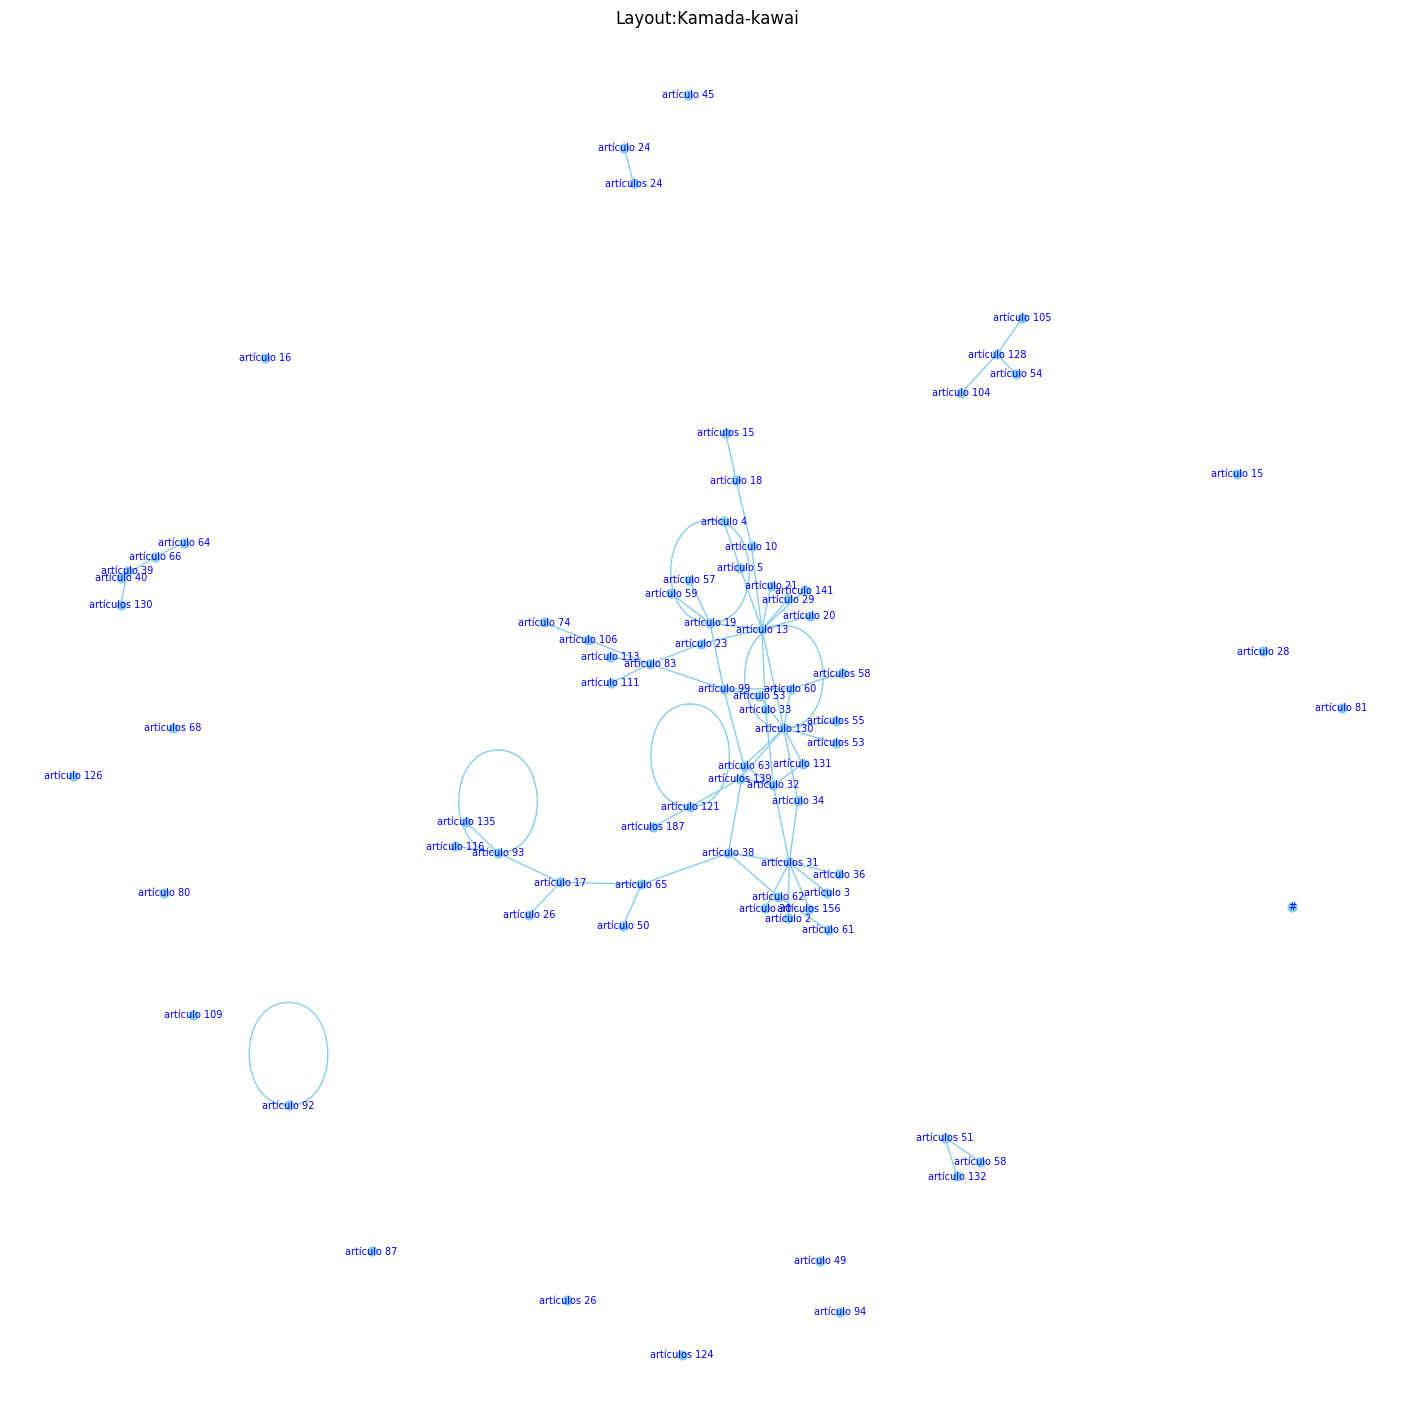

In [179]:
# VISUALIZAR GRAFOS
# LAYOUTS: https://networkx.org/documentation/stable/reference/drawing.html
# help(nx.layout.Functions)

# LAYOUT Mismo layout siempre 
semilla = 32

# No se ven bien
layout_names = ["Fruchterman-Reingold", "Kamada-kawai", "Shell", "Spectral", "Spring", "Planar"]
#postest = nx.kamada_kawai_layout( GC80 )
#postest = nx.spectral_layout( GC80 )  
#postest = nx.spiral_layout( GC80 )
#postest = nx.multipartite_layout( GC80  )
#postest = nx.planar_layout( GC80 )

#ok
#postest = nx.circular_layout( GC80 ) # no semilla  
#postest = nx.arf_layout( GC80  ) # no semilla, desordenado
#postest = nx.spring_layout( GC80, seed=semilla )  
#postest =  nx.shell_layout( GC80 ) 
postest = nx.fruchterman_reingold_layout( GC80, seed=semilla ) # ok

# Graficar 
cual = 1
plt.figure(figsize=(18,18))
plt.title("Layout:" + layout_names[ cual ] )
nx.draw(GC80, node_size=40, node_color="skyblue", edge_color="skyblue", with_labels=True, font_size=7, font_color="blue", pos=postest )
#plt.savefig('img02/'+layout_names[ cual ]+'.png')
plt.show()


## REPARACIONES A CONSIDERAR

56bis por ejemplo, no aparecen los bis con su titulo
cambiar titulo de df_menciones a los nombre sde articul. de df_articulos (q tiene titulos de capitulos??? ) 
## ANALISIS POSIBLES
Objetivos reconocer las relaciones entre las entidades citadas  
Limites.  
Setting tecnico: lenguajes, procesos y metodos  
exploratorio: extensiones de capitulos, de articulos en palabras y cantidad de articulos 
Capitulos co mas citas, ranking  
Articulos con mas citas, ranking  
articulos mas citados  
Colocaciones desde donde se citan los mas citados  
Tipos de contexto mas citado,por ejempolko organico    
Contexto del mas citado,palabras, frecuentes, etc. 
Tipó de red, bipartito?  
Vosualizaciones epxloratorioas, 
hay diferencias entre articulos y disposiciones transitorias? 
dejar solamente a los quie tienen citas
ver que pasa co lo suq e se citan a sis mismos 



<div style="background-color:red; padding:10px;color:blue; 
            color:white;text-align:center; font-size:20px;"> 
HASTA ACA 
</div>


<div style="background-color:skyblue; padding:10px;color:blue; color:white;text-align:center; font-size:20px;"> 
OLD3- CAPS Y ART TODO:  ADQUIRIR Y FORMATEAR CONTENIDO
</div>


## CONTAR FRECUENTES

In [ ]:
### - - - - - - - - - - - - - - - - - - 
### 
### IMPORTAR STOPWORDS
### 
### - - - - - - - - - - - - - - - - - - 

l_stopwords = []
archivo = 'in_stopwords/stop_words_2020.txt'

with open(archivo ) as a:
    txt = a.readlines()
#    l_stopwords.append(txt)
#print( txt )

for l in txt:
    txt = l.rstrip()
    l_stopwords.append(txt)

print( '- - - - - - - - - ' )
print( l_stopwords )

### - - 
### OK
### - - 

In [ ]:
### - - - - - - - - - - - - - - - - - - 
### 
### CONTAR PALABRAS FRECUENTES
### 
### - - - - - - - - - - - - - - - - - - 

##ordenar lista
def cant( lista ):
    return lista[1]

l_articulos_text_palabras_frecuentes = [] ## parr texto de articulos y titulos

for i in range( articulos_cuantos ):
    ## split de cada texto
    arttxt =  l_articulos_text[i]
    arttxt_split = arttxt.split() ## lista a examinar para contar

    ## Sacar stopwortds
    print( '\n- - - - - - - -\n', i, 'PRELIMPIEZA l: ', len(arttxt_split), '\nw: ',arttxt_split,'\n' )
    for p in l_stopwords: 
        while p in arttxt_split:
            arttxt_split.remove( p ) #Quita elemento, NO develve nada  
        
    print( i, 'POSTLIMPIEZA l: ', len(arttxt_split), '\nw: ',arttxt_split )

    
    ## append solo las relevantes sin stopwords.     
    ## comtar palabras de cada texto, guardarlas en lista
    frec_palabras_temp = []
    for w in arttxt_split:
        data = [w, arttxt_split.count(w)] # palabra w es contada
        frec_palabras_temp.append(data)
    #print( len(frec_palabras_temp) )

    ## limpiar dejar palabras no repetidas
    limpio_temp = [] 
    for p in frec_palabras_temp:
        if p not in limpio_temp:
            limpio_temp.append(p)

    
    ordenado_temp = sorted(limpio_temp, key=cant, reverse=True) 

    l_articulos_text_palabras_frecuentes.append( ordenado_temp ) 
    
    #print( '\n', i, 'FRECUENTES- - - - - - - - - - ' )
    #print( l_articulos_text_palabras_frecuentes[i] )
    # print( 'orig-\n', frec_palabras_temp )
    # print( '\ncant-\n', len(limpio_temp) )
    # print( '\nlimp-\n', limpio_temp )
    # print( '\nord-\n', ordenado_temp )
    # print( '\ntext-\n', arttxt )

    
### - - 
### OK
### - - 


## DF a JSON

In [ ]:
### - - - - - - - - - - - - - - - - - - 
### 
### GUARDAR COMO JSON
### 
### - - - - - - - - - - - - - - - - - - 

df.to_json('medio/c22.json', orient = 'records', compression = 'infer')

In [ ]:
## forzar encoding caracteres latinos

with open('c22records_2.json', 'w', encoding='utf-8') as file:
    df.to_json(file, orient = 'records', force_ascii=False)


## GRAFICOS X VER

In [214]:
# para contar palabras

parr = ['una', 'una dos', 'una dos tres', 'una dos tres cuatro', 'una dos tres cuatro cinco']
l_parr_words_len = []
l_art_words_len  = []

art_words_len = 0
for i in range( len(parr) ): 
    parr_cuantas_palabras = len( parr[i].split() )
    l_parr_words_len.append( parr_cuantas_palabras )
    
    art_words_len = art_words_len + parr_cuantas_palabras
l_art_words_len.append( art_words_len ) 

print( l_parr_words_len )
print( l_art_words_len )
 
    

[1, 2, 3, 4, 5]
[15]


In [440]:
import seaborn as sns
sns.set()

item = [ 
"12. Dinamismo presentación", "05. Limitaciones solución","01. Marco Teórico","10. Manejo del tiempo",
"04. Solución propuesta","02. Profundidad conceptos","11. Claridad de la presentación","09. Uso de textos y figuras",
"08. Aspectos éticos","07. Estado investigación","06. Aporte investigación","03. Preguntas investigación" 
]
orden = [ 12, 5, 1, 10, 4, 2, 11, 9, 8, 7, 6, 3]

fortalezas = [10, 3, 5, 3, 7, 5, 7, 8, 3, 5, 3, 5]
debilidades = [1, 1, 1, 2, 2, 6, 7, 8, 8, 8, 8, 10]



In [1]:
# para el grafico count word

feedback_df = {
              'orden'      : orden,  
              'item'       : item,  
              'fortalezas' : fortalezas, 
              'debilidades': debilidades 
             } 

feedback_df = pd.DataFrame.from_dict( feedback_df )

feedback_df = feedback_df.sort_values(by=['orden'])
feedback_df


NameError: name 'orden' is not defined

In [475]:
font_color = "white"  #'#525252'
hfont      = {'fontname':'Calibri'}
facecolor  = "white" #'#eaeaf2'
color0    = 'orangered'
color1    = 'skyblue'
index      = feedback_df.orden

column0 = feedback_df['debilidades']
title0  = 'debilidades'   

column1 = feedback_df['fortalezas']
title1  = 'fortalezas'


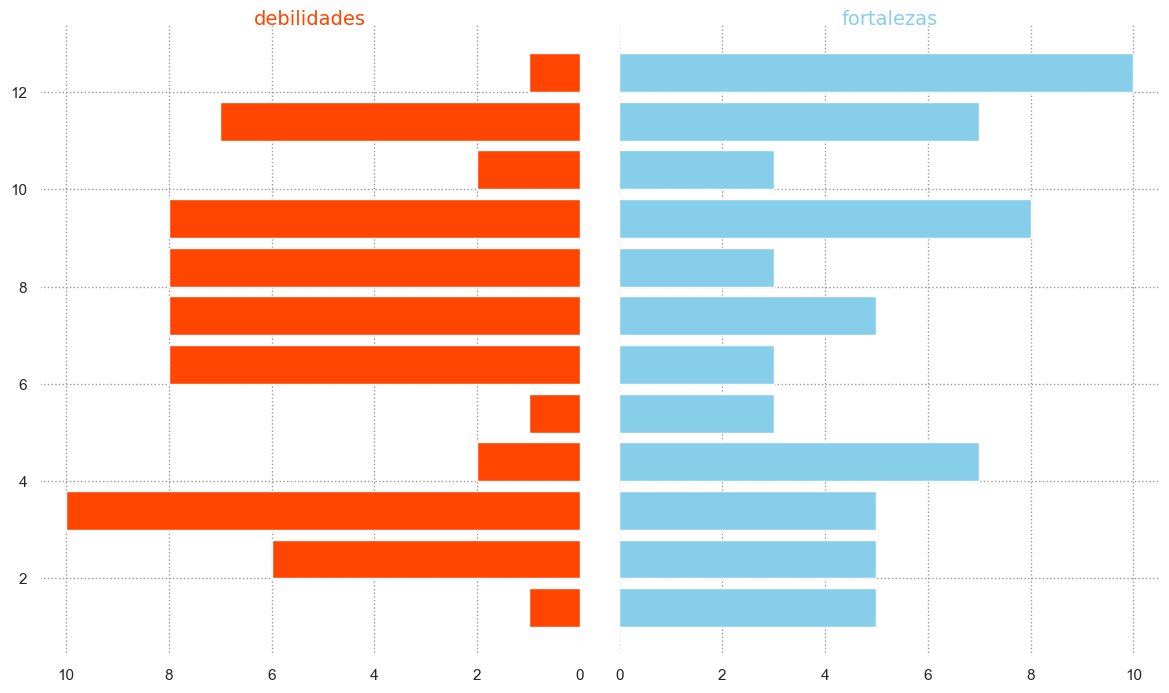

In [485]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgreen', "grid.color": ".6", "grid.linestyle": ":"})

fig, axes = plt.subplots(figsize=(12,7), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='edge', color=color0, zorder=10)
axes[0].set_title(title0, fontsize=14, pad=0, color=color0, **hfont)
axes[0].invert_xaxis()  

for i, v in enumerate(y):
    axes.text(i, v + 0.2, str(v), ha='center')

axes[1].barh(index, column1, align='edge', color=color1, zorder=10)
axes[1].set_title(title1, fontsize=14, pad=0, color=color1, **hfont)
    
    
ruta = "/Users/ricardov/Desktop/2024_rv/00_PhD_2024/01_CLASES_2024_1/03_SeminarioII_2024A/T_Presentacion/img2/"    
plt.savefig( ruta+"grafico_todo.png") 

In [ ]:
#### por ver

# xxxx xx x x x x x x x
art_menciones = []
for texto in parrafo:
#    art_words.extend(re.findall(r'\bArt\w*\b', texto, re.IGNORECASE))
    art_menciones.extend(re.findall(r'\bart\w*\s\d{1,3}\b', texto, re.IGNORECASE))

print(art_menciones) 

parrafo = ["iguales en art 1  dignidad y derechos Art 2. La familia es el núcleo artículo 31 fundamental de la sociedad Articulo 32.  El Estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad articulo 411  para cumplir sus articulo 421 propios fines específicos."]

# Usar re.findall() para encontrar todas las palabras que comienzan con "art" y van acompañadas de números de 1, 2 o 3 caracteres
art_words = []
for texto in parrafo:
    art_words.extend(re.findall(r'\bArt\s\d{1,3}\b', texto, re.IGNORECASE))
    #art_words.extend(re.findall(r'\bArt\b', texto, re.IGNORECASE))
print(art_words)



